In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import csv
import pickle
import seaborn as sns
from sklearn import decomposition
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
sns.set(color_codes=True)
%matplotlib inline 
# Import necessary modules
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [40]:
data_frame = pd.read_csv("/content/drive/MyDrive/hemolysis/FVs-labled-uploaded.csv")

In [4]:
data_frame.shape

(1220, 155)

In [3]:
data_frame.head(5)

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,...,F115,F116,F117,F118,F119,F120,F121,F122,F123,F124,F125,F126,F127,F128,F129,F130,F131,F132,F133,F134,F135,F136,F137,F138,F139,F140,F141,F142,F143,F144,F145,F146,F147,F148,F149,F150,F151,F152,Positive,Nagetive
0,2246,17529,178835,2053029,17122,132541,1349681,169224,1292329,1895104,2246,-39352605,689504726039,-12080948547355143,-38438890,673495303813,-11800443558782853,657857680920,-11526452974094719,-11258825470823944,6.943751e+16,4.168484e+18,4.539023e+23,-1.653375e+27,4.168484e+18,2.560328e+22,-1.447345e+26,4.539023e+23,-1.447345e+26,-1.653375e+27,16,4,20,12,13,12,2,13,13,11,...,-17146538268526557117757465,-1131215892935,4158773088822407599,-15289206695534861699752727,3708290289245478265,-13633063287716643213250791,-12156315125374851030256445,4.168175e+26,1.550323e+29,1.375887e+34,-1.068445e+38,1.550323e+29,7.907290e+32,-5.598586e+36,1.375887e+34,-5.598586e+36,-1.068445e+38,1638,125,2146,1038,1730,1406,71,1763,1554,1043,780,1055,228,1177,1364,2346,1856,1284,346,1360,0,0,1
1,165,478,1678,6640,399,1112,3778,1159,3106,3747,165,-78392,37244570,-17695286636,-65436,31088798,-14770477608,25950922,-12329326908,-10291817814,4.681122e+05,8.427282e+06,5.524012e+09,8.305676e+11,8.427282e+06,5.090301e+08,4.379161e+10,5.524012e+09,4.379161e+10,8.305676e+11,2,0,0,0,0,3,0,1,2,6,...,-12043803540486,-1939920,5975933373,-18408903625565,9134207574,-28137974500157,-43008904906866,4.976522e+23,-5.234216e+25,1.956303e+31,-1.839723e+35,-5.234216e+25,6.878960e+29,-1.348713e+34,1.956303e+31,-1.348713e+34,-1.839723e+35,17,0,0,0,0,38,0,10,18,61,0,3,14,0,0,4,0,6,0,0,0,1,0
2,68662,2861239,157505727,9749775799,2849775,118972051,6555964967,154876633,6463049855,9452836059,68662,-196455530979,562098040471713587,-1608273412049812179615081,-195668401275,559845907027280551,-1601829613745537819442561,557602797180789133,-1595411633736461275618607,-1589019368575855679914791,7.716633e+128,2.626744e+129,3.146493e+139,-1.297585e+145,2.626744e+129,1.513598e+138,-8.601314e+143,3.146493e+139,-8.601314e+143,-1.297585e+145,456,229,384,322,377,394,127,334,428,568,...,-31428969940805759943401644734158813646,-1806889790866118472,7646888393517133858161088433,-32362185230388382422742729050659753765,7873946206102229806060340064,-33323110329689587569672509681636918565,-34312568021579749778821099853685091644,5.008407e+29,6.293669e+31,1.882154e+37,-1.843576e+41,6.293669e+31,9.949941e+35,-1.368706e+40,1.882154e+37,-1.368706e+40,-1.843576e+41,1598923,734611,1280288,1195889,1298970,1306510,384429,1158778,1525078,1893372,390968,994397,773628,721284,697783,1338539,1199780,2231554,301698,961917,0,0,1
3,5711,68981,1079211,18972389,68319,824753,12846919,1070043,12849709,18852219,5711,-393881510,27165583142160,-1873581001902754412,-390101490,26904878993504,-1855600500809710348,26646677279592,-1837792590268006916,-1820155613294423304,3.490530e+27,5.869982e+28,2.246126e+35,-3.208812e+39,5.869982e+28,1.212755e+34,-2.599913e+38,2.246126e+35,-2.599913e+38,-3.208812e+39,31,4,30,29,18,25,6,45,43,31,...,-43934808594037937266588256124,-62014407580022,1628582631433815593942,-42768793428939205168135112496,1585360591629230572208,-41633723917387797844523354808,-40528778772060650353350324050,2.930123e+27,3.476248e+29,1.106639e+35,-1.096330e+39,3.476248e+29,5.873950e+33,-8.239689e+37,1.106639e+35,-8.239689e+37,-1.096330e+39,7388,1199,8527,6489,4860,6415,1119,11805,11428,9288,2709,15000,5257,3119,3818,16646,7374,9779,627,6281,0,1,0
4,22549,545235,17457523,630421305,537731,12928489,412707723,16903889,405205129,597250961,22549,-12293958780,6702799351665598,-3654438735423736157160,-12124758588,6610549571894884,-3604143154948443525770,6519569422559356,-3554539790789049490614,-3505619115933694893102,6.617910e+66,3.754891e+69,1.747775e+76,-1.725939e+81,3.754891e+69,8.780960e+74,-1.142404e+80,1.747775e+76,-1.142404e+80,-1.725939e+81,195,45,94,154,78,175,63,98,88

In [41]:
data_frame.tail(5)

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,...,F115,F116,F117,F118,F119,F120,F121,F122,F123,F124,F125,F126,F127,F128,F129,F130,F131,F132,F133,F134,F135,F136,F137,F138,F139,F140,F141,F142,F143,F144,F145,F146,F147,F148,F149,F150,F151,F152,Positive,Nagetive
1215,6089,77699,1307517,24736595.0,78266,990702,16531278,1307264,16423476,24303842.0,6089,-4.730315e+08,3.674800e+13,-2.854820e+18,-4.764834e+08,3.701620e+13,-2.875650e+18,3.728630e+13,-2.896630e+18,-2.917770e+18,2.230000e+30,1.190000e+32,2.160000e+38,-3.700000e+42,1.190000e+32,1.120000e+37,-2.770000e+41,2.160000e+38,-2.770000e+41,-3.700000e+42,29,31,32,35,20,34,24,33,36,58,...,-8.676340e+28,-1.010280e+14,3.068920e+21,-9.322420e+28,3.297440e+21,-1.001660e+29,-1.076250e+29,3.740000e+27,4.380000e+29,1.420000e+35,-1.410000e+39,4.380000e+29,7.590000e+33,-1.060000e+38,1.420000e+35,-1.060000e+38,-1.410000e+39,8254,10993,8995,13526,7202,8908,7218,8876,11150,16745,3763,6181,9818,6433,8382,15450,9546,10980,1303,2992,0,0,1
1216,15484,310865,8215659,244135211.0,307896,6165924,162551386,8062716,161059656,237659310.0,15484,-4.813123e+09,1.496130e+15,-4.650660e+20,-4.767154e+09,1.481850e+15,-4.606240e+20,1.467690e+15,-4.562250e+20,-4.518680e+20,7.470000e+51,5.990000e+53,7.100000e+60,-4.250000e+65,5.990000e+53,3.650000e+59,-3.070000e+64,7.100000e+60,-3.070000e+64,-4.250000e+65,109,32,75,117,54,80,34,68,106,133,...,-2.052570e+32,-4.595290e+15,9.838720e+23,-2.106510e+32,1.009730e+24,-2.161880e+32,-2.218700e+32,2.530000e+28,3.190000e+30,9.500000e+35,-9.310000e+39,3.190000e+30,5.030000e+34,-6.930000e+38,9.500000e+35,-6.930000e+38,-9.310000e+39,73976,29194,57716,90339,42251,59635,26945,57380,79473,103399,27057,53526,54892,57608,48641,103971,65793,68132,11307,34106,0,0,1
1217,9648,152909,3207793,75957437.0,151221,2393994,50156300,3111071,49004012,71991933.0,9648,-1.475113e+09,2.255350e+14,-3.448270e+19,-1.458829e+09,2.230450e+14,-3.410200e+19,2.205830e+14,-3.372560e+19,-3.335330e+19,1.880000e+39,2.840000e+41,5.420000e+47,-1.690000e+52,2.840000e+41,2.810000e+46,-1.220000e+51,5.420000e+47,-1.220000e+51,-1.690000e+52,42,33,53,73,39,48,27,52,63,82,...,-4.556260e+30,-6.851750e+14,5.665100e+22,-4.683970e+30,5.823900e+22,-4.815270e+30,-4.950240e+30,9.740000e+27,1.140000e+30,3.670000e+35,-3.620000e+39,1.140000e+30,1.940000e+34,-2.700000e+38,3.670000e+35,-2.700000e+38,-3.620000e+39,18303,17507,26194,33379,16412,21167,14305,21071,30971,41082,8597,23675,22340,24088,16777,39122,29255,25152,5464,9292,0,0,1
1218,3383,33740,435248,6330560.0,32404,321109,4124927,399734,3940599,5548666.0,3383,-1.141087e+08,3.848890e+12,-1.298230e+17,-1.095903e+08,3.696480e+12,-1.246830e+17,3.550120e+12,-1.197450e+17,-1.150040e+17,9.730000e+21,9.150000e+23,2.170000e+29,-1.580000e+33,9.150000e+23,1.130000e+28,-1.210000e+32,2.170000e+29,-1.210000e+32,-1.580000e+33,30,4,20,29,15,22,13,15,26,37,...,-6.820150e+26,-8.206960e+12,7.430290e+19,-6.727130e+26,7.328950e+19,-6.635370e+26,-6.544860e+26,1.110000e+27,3.540000e+29,3.710000e+34,-2.920000e+38,3.540000e+29,1.950000e+33,-1.620000e+37,3.710000e+34,-1.620000e+37,-2.920000e+38,5975,653,3431,4956,2538,3270,1920,2427,3823,7060,1071,877,2796,4541,3269,3325,2518,3799,830,1996,0,0,1
1219,2450,20825,228305,2804927.0,19916,165843,1800541,206920,1701275,2428040.0,2450,-5.100042e+07,1.061650e+12,-2.209980e+16,-4.877428e+07,1.015310e+12,-2.113520e+16,9.709920e+11,-2.021270e+16,-1.933040e+16,1.210000e+18,7.880000e+19,1.100000e+25,-4.730000e+28,7.880000e+19,5.810000e+23,-3.920000e+27,1.100000e+25,-3.920000e+27,-4.730000e+28,18,9,14,12,10,15,5,13,13,32,...,-3.264000e+25,-1.782840e+12,7.592860e+18,-3.233700e+25,7.522370e+18,-3.203680e+25,-3.173930e+25,5.100000e+26,1.290000e+29,1.800000e+34,-1.600000e+38,1.290000e+29,1.000000e+33,-1.060000e+37,1.800000e+34,-1.060000e+37,-1.600000e+38,2491,1039,1802,1321,1269,1607,662,1210,1710,4043,952,708,2229,1301,1537,1534,1750,1715,909,592,0,0,1


In [42]:
print (data_frame.isnull().values.any())

False


In [43]:
def plot_corr(data_frame, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        data_frame: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = data_frame.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


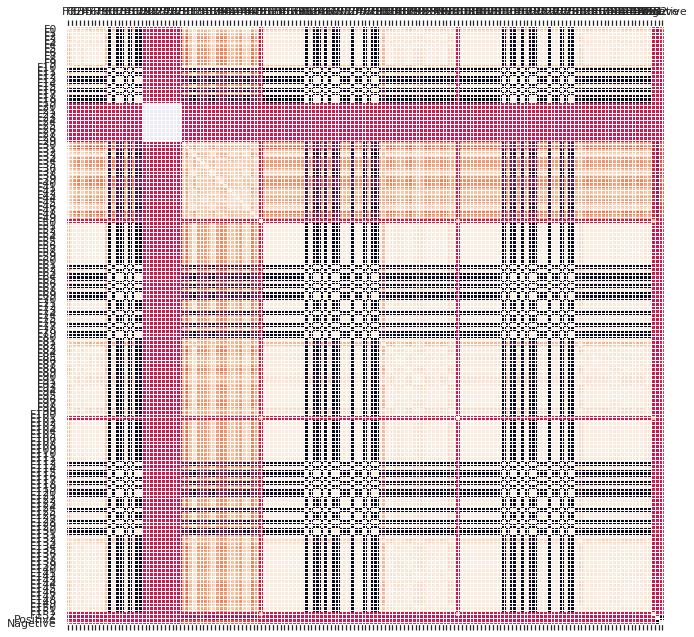

In [44]:
plot_corr(data_frame)

In [45]:
data_frame.corr()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,...,F115,F116,F117,F118,F119,F120,F121,F122,F123,F124,F125,F126,F127,F128,F129,F130,F131,F132,F133,F134,F135,F136,F137,F138,F139,F140,F141,F142,F143,F144,F145,F146,F147,F148,F149,F150,F151,F152,Positive,Nagetive
F0,1.000000,0.908076,0.791089,0.724730,0.906963,0.791429,0.725255,0.789558,0.724723,0.723580,1.000000,-0.723592,0.664700,-0.655408,-0.723476,0.664725,-0.655417,0.664752,-0.655426,-0.655436,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.928161,0.696766,0.972525,0.916284,0.898863,0.886833,0.914985,0.946634,0.926632,0.926553,...,-0.653260,-0.664289,0.654391,-0.653265,0.654426,-0.653269,-0.653274,0.784472,0.782482,0.784380,-0.784518,0.782482,0.784068,-0.783882,0.784380,-0.783882,-0.784518,0.805469,0.855007,0.796417,0.733314,0.818706,0.819322,0.805146,0.767092,0.753663,0.837659,0.848035,0.831984,0.757016,0.760601,0.779890,0.837981,0.756256,0.758136,0.850569,0.805992,0.046730,-0.276826,0.276826
F1,0.908076,1.000000,0.972170,0.939656,0.999956,0.972391,0.940040,0.971602,0.939759,0.939078,0.908076,-0.938954,0.900418,-0.893051,-0.938929,0.900444,-0.893059,0.900470,-0.893068,-0.893076,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.781805,0.517859,0.879439,0.970509,0.746169,0.710040,0.751045,0.913917,0.951966,0.751197,...,-0.891241,-0.900141,0.892203,-0.891245,0.892234,-0.891249,-0.891253,0.969503,0.968244,0.969475,-0.969561,0.968244,0.969368,-0.969288,0.969475,-0.969288,-0.969561,0.976657,0.931046,0.974271,0.942687,0.976780,0.976727,0.975869,0.960436,0.954258,0.983193,0.985270,0.983053,0.950677,0.956528,0.964286,0.987429,0.954346,0.955919,0.981911,0.974834,0.021502,-0.115870,0.115870
F2,0.791089,0.972170,1.000000,0.993246,0.972568,0.999991,0.993408,0.999978,0.993314,0.993060,0.791089,-0.992970,0.974497,-0.969943,-0.992975,0.974516,-0.969948,0.974535,-0.969954,-0.969960,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.646197,0.365250,0.763617,0.932882,0.602169,0.560343,0.606638,0.829698,0.898924,0.594081,...,-0.968752,-0.974351,0.969391,-0.968755,0.969411,-0.968758,-0.968761,0.999911,0.999407,0.999906,-0.999899,0.999407,0.999896,-0.999873,0.999906,-0.999873,-0.999899,0.997328,0.882931,0.999037,0.993154,0.985580,0.989060,0.996502,0.997730,0.996520,0.982287,0.979484,0.987640,0.992143,0.995883,0.997105,0.992837,0.996652,0.996465,0.969927,0.992513,0.006966,-0.050965,0.050965
F3,0.724730,0.939656,0.993246,1.000000,0.940158,0.993054,0.999997,0.993434,0.999995,0.999991,0.724730,-0.999992,0.993560,-0.990966,-0.999993,0.993571,-0.990970,0.993583,-0.990973,-0.990977,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.574882,0.283567,0.698105,0.900246,0.524205,0.484367,0.531764,0.777607,0.859591,0.510405,...,-0.990236,-0.993489,0.990631,-0.990238,0.990644,-0.990239,-0.990241,0.994360,0.994301,0.994356,-0.994284,0.994301,0.994375,-0.994381,0.994356,-0.994381,-0.994284,0.986766,0.835336,0.990312,0.998603,0.967642,0.975206,0.986125,0.995974,0.996948,0.958963,0.954346,0.968041,0.994363,0.995092,0.993976,0.974896,0.998242,0.996363,0.940550,0.979861,0.001470,-0.029806,0.029806
F4,0.906963,0.999956,0.972568,0.940158,1.000000,0.972819,0.940554,0.972056,0.940283,0.939609,0.906963,-0.939454,0.900883,-0.893487,-0.939441,0.900910,-0.893496,0.900938,-0.893504,-0.893513,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.780510,0.517806,0.878412,0.970221,0.744666,0.708723,0.750055,0.912858,0.951402,0.749987,...,-0.891667,-0.900609,0.892635,-0.891671,0.892666,-0.891676,-0.891680,0.969946,0.968632,0.969922,-0.970012,0.968632,0.969814,-0.969744,0.969922,-0.969744,-0.970012,0.977055,0.931903,0.974793,0.943232,0.977121,0.977042,0.976384,0.960857,0.954802,0.983714,0.985467,0.983407,0.950906,0.957102,0.964719,0.987657,0.954726,0.956327,0.982246,0.975125,0.021071,-0.114466,0.114466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

Check class distribution
Rare events are hard to predict

In [46]:
num_obs = len(data_frame)
num_true = len(data_frame.loc[data_frame['Positive'] == 1])
print(num_true)

num_false = len(data_frame.loc[data_frame['Nagetive'] == 1])

print(num_false)

print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

329
891
Number of True cases:  329 (26.97%)
Number of False cases: 891 (73.03%)


**Spliting the data**
70% for training, 30% for testing



In [55]:
#from sklearn.cross_validation import train_test_split

#feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['Positive','Nagetive']

# Separating out the target
y = data_frame.loc[:,['Positive']].values
y = np.nan_to_num(y)
df2 = data_frame.drop(['Positive','Nagetive'], axis=1)
df2.reset_index(inplace=True)

# Separating out the features
x = df2.values
#print(x)

# Standardizing the features
x = StandardScaler().fit_transform(x)


In [57]:
# evaluate a logistic regression model using k-fold cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

# train models
import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}



# XGBClassifier
model1 = XGBClassifier(random_state=42)
# knn
model2 = KNeighborsClassifier(n_neighbors=4)
#SVC
model3 = SVC(kernel='linear', C=1, random_state=42,probability=True)
#RandomForestClassifier
model4 = RandomForestClassifier(random_state=42)
#AdaBoostClassifier
model5 = AdaBoostClassifier(random_state=42)
#DecisionTreeClassifier
model6 = DecisionTreeClassifier(random_state=42)
#MLPClassifier
model7 =MLPClassifier (hidden_layer_sizes=(13,13,13),max_iter=500, random_state=42)


 

In [49]:
#for model 1 XGB

training_start = time.perf_counter()
#n_splits=10, random_state=42, shuffle=True
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model

scores = cross_val_score(model1, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores1 = cross_validate(model1, x, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)
print(scores1.keys())

print(scores1['test_accuracy']) 
print('Accuracy: %.3f (%.3f)' % (mean(scores1['test_accuracy']), std(scores1['test_accuracy'])))

print(scores1['fit_time'])
print('fit_time: %.3f (%.3f)' % (mean(scores1['fit_time']), std(scores1['fit_time'])))

print(scores1['test_recall'])
print('test_recall: %.3f (%.3f)' % (mean(scores1['test_recall']), std(scores1['test_recall'])))


print(scores1['test_precision'])
print('test_precision: %.3f (%.3f)' % (mean(scores1['test_precision']), std(scores1['test_precision'])))


print(scores1['test_f1_score'])
print('test_f1_score: %.3f (%.3f)' % (mean(scores1['test_f1_score']), std(scores1['test_f1_score'])))
training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing xgboost in independent test: %4.3f" % (model_train_time))


Accuracy: 0.936 (0.015)
dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1_score', 'train_f1_score'])
[0.90983607 0.91803279 0.93442623 0.91803279 0.94262295 0.93442623
 0.95901639 0.95081967 0.95081967 0.94262295]
Accuracy: 0.936 (0.015)
[1.2872417  1.29057622 1.28878117 1.29381156 1.29231763 1.28021526
 1.30610943 1.27941203 1.30011463 1.29496574]
fit_time: 1.291 (0.008)
[0.82857143 0.79310345 0.86842105 0.79411765 0.88235294 0.78571429
 0.8974359  0.82352941 0.9375     0.92307692]
test_recall: 0.853 (0.053)
[0.85294118 0.85185185 0.91666667 0.9        0.90909091 0.91666667
 0.97222222 1.         0.88235294 0.82758621]
test_precision: 0.903 (0.051)
[0.84057971 0.82142857 0.89189189 0.84375    0.89552239 0.84615385
 0.93333333 0.90322581 0.90909091 0.87272727]
test_f1_score: 0.876 (0.035)
Time consumed for testing xgboost in independent test: 15.155


In [51]:
#for model 2 KNN

training_start = time.perf_counter()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model

scores2 = cross_validate(model2, x, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)
print(scores2.keys())

print(scores2['test_accuracy']) 
print('Accuracy: %.3f (%.3f)' % (mean(scores2['test_accuracy']), std(scores2['test_accuracy'])))

print(scores2['fit_time'])
print('fit_time: %.3f (%.3f)' % (mean(scores2['fit_time']), std(scores2['fit_time'])))

print(scores2['test_recall'])
print('test_recall: %.3f (%.3f)' % (mean(scores2['test_recall']), std(scores2['test_recall'])))


print(scores2['test_precision'])
print('test_precision: %.3f (%.3f)' % (mean(scores2['test_precision']), std(scores2['test_precision'])))


print(scores2['test_f1_score'])
print('test_f1_score: %.3f (%.3f)' % (mean(scores2['test_f1_score']), std(scores2['test_f1_score'])))
training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing knn in crossvalidation test: %4.3f" % (model_train_time))


dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1_score', 'train_f1_score'])
[nan nan nan nan nan nan nan nan nan nan]
Accuracy: nan (nan)
[0.00187063 0.00212717 0.00163484 0.0016048  0.00155735 0.0013442
 0.00164914 0.00134897 0.00162387 0.00152135]
fit_time: 0.002 (0.000)
[nan nan nan nan nan nan nan nan nan nan]
test_recall: nan (nan)
[nan nan nan nan nan nan nan nan nan nan]
test_precision: nan (nan)
[nan nan nan nan nan nan nan nan nan nan]
test_f1_score: nan (nan)
Time consumed for testing knn in crossvalidation test: 0.169


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 400, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr", multi_output=True)
  File "/usr/loca

In [ ]:
#for model 3 SVM

training_start = time.perf_counter()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model

scores3 = cross_validate(model3, x, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)
print(scores3.keys())

print(scores3['test_accuracy']) 
print('Accuracy: %.3f (%.3f)' % (mean(scores3['test_accuracy']), std(scores3['test_accuracy'])))

print(scores3['fit_time'])
print('fit_time: %.3f (%.3f)' % (mean(scores3['fit_time']), std(scores3['fit_time'])))

print(scores3['test_recall'])
print('test_recall: %.3f (%.3f)' % (mean(scores3['test_recall']), std(scores3['test_recall'])))


print(scores3['test_precision'])
print('test_precision: %.3f (%.3f)' % (mean(scores3['test_precision']), std(scores3['test_precision'])))


print(scores3['test_f1_score'])
print('test_f1_score: %.3f (%.3f)' % (mean(scores3['test_f1_score']), std(scores3['test_f1_score'])))


training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing SVM in crossvalidation test: %4.3f" % (model_train_time))


dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1_score', 'train_f1_score'])
[0.89344262 0.91803279 0.90983607 0.92622951 0.89344262 0.92622951
 0.94262295 0.93442623 0.92622951 0.91803279]
Accuracy: 0.919 (0.015)
[0.50084162 0.51693583 0.50974059 0.51353168 0.48562264 0.49635053
 0.51111031 0.50879383 0.50646091 0.48820281]
fit_time: 0.504 (0.010)
[0.82857143 0.93103448 0.89473684 0.85294118 0.79411765 0.82142857
 0.87179487 0.88235294 0.9375     0.84615385]
test_recall: 0.866 (0.044)
[0.80555556 0.77142857 0.82926829 0.87878788 0.81818182 0.85185185
 0.94444444 0.88235294 0.81081081 0.78571429]
test_precision: 0.838 (0.050)
[0.81690141 0.84375    0.86075949 0.86567164 0.80597015 0.83636364
 0.90666667 0.88235294 0.86956522 0.81481481]
test_f1_score: 0.850 (0.031)
Time consumed for testing SVM in crossvalidation test: 3.104


In [ ]:
#for model 4=RF

training_start = time.perf_counter()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model

scores4 = cross_validate(model4, x, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)
print(scores4.keys())

print(scores4['test_accuracy']) 
print('Accuracy: %.3f (%.3f)' % (mean(scores4['test_accuracy']), std(scores4['test_accuracy'])))

print(scores4['fit_time'])
print('fit_time: %.3f (%.3f)' % (mean(scores4['fit_time']), std(scores4['fit_time'])))

print(scores4['test_recall'])
print('test_recall: %.3f (%.3f)' % (mean(scores4['test_recall']), std(scores4['test_recall'])))


print(scores4['test_precision'])
print('test_precision: %.3f (%.3f)' % (mean(scores4['test_precision']), std(scores4['test_precision'])))


print(scores4['test_f1_score'])
print('test_f1_score: %.3f (%.3f)' % (mean(scores4['test_f1_score']), std(scores4['test_f1_score'])))

training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing RF in crossvalidation test: %4.3f" % (model_train_time))


dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1_score', 'train_f1_score'])
[0.92622951 0.90163934 0.95081967 0.93442623 0.90983607 0.89344262
 0.94262295 0.93442623 0.93442623 0.95901639]
Accuracy: 0.929 (0.020)
[0.88686323 0.87334037 0.89220238 0.89854169 0.91300201 0.91278243
 0.92809343 0.86571956 0.89245629 0.89142537]
fit_time: 0.895 (0.018)
[0.77142857 0.68965517 0.84210526 0.79411765 0.70588235 0.64285714
 0.82051282 0.76470588 0.84375    0.84615385]
test_recall: 0.772 (0.068)
[0.96428571 0.86956522 1.         0.96428571 0.96       0.85714286
 1.         1.         0.9        0.95652174]
test_precision: 0.947 (0.051)
[0.85714286 0.76923077 0.91428571 0.87096774 0.81355932 0.73469388
 0.90140845 0.86666667 0.87096774 0.89795918]
test_f1_score: 0.850 (0.056)
Time consumed for testing RF in crossvalidation test: 4.943


In [ ]:
#for model 5= Adaboost

training_start = time.perf_counter()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model

scores5 = cross_validate(model5, x, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)
print(scores5.keys())

print(scores5['test_accuracy']) 
print('Accuracy: %.3f (%.3f)' % (mean(scores5['test_accuracy']), std(scores5['test_accuracy'])))

print(scores5['fit_time'])
print('fit_time: %.3f (%.3f)' % (mean(scores5['fit_time']), std(scores5['fit_time'])))

print(scores5['test_recall'])
print('test_recall: %.3f (%.3f)' % (mean(scores5['test_recall']), std(scores5['test_recall'])))


print(scores5['test_precision'])
print('test_precision: %.3f (%.3f)' % (mean(scores5['test_precision']), std(scores5['test_precision'])))


print(scores5['test_f1_score'])
print('test_f1_score: %.3f (%.3f)' % (mean(scores5['test_f1_score']), std(scores5['test_f1_score'])))

training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing adaboost in crossvalidation test: %4.3f" % (model_train_time))


dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1_score', 'train_f1_score'])
[0.92622951 0.90983607 0.92622951 0.90983607 0.97540984 0.93442623
 0.97540984 0.93442623 0.95901639 0.94262295]
Accuracy: 0.939 (0.023)
[1.2178154  1.23977804 1.22211027 1.25444937 1.20348001 1.22852874
 1.26264977 1.23258114 1.23111391 1.23420906]
fit_time: 1.233 (0.016)
[0.82857143 0.75862069 0.81578947 0.76470588 0.91176471 0.78571429
 0.94871795 0.76470588 0.96875    0.92307692]
test_recall: 0.847 (0.078)
[0.90625    0.84615385 0.93939394 0.89655172 1.         0.91666667
 0.97368421 1.         0.88571429 0.82758621]
test_precision: 0.919 (0.057)
[0.86567164 0.8        0.87323944 0.82539683 0.95384615 0.84615385
 0.96103896 0.86666667 0.92537313 0.87272727]
test_f1_score: 0.879 (0.050)
Time consumed for testing adaboost in crossvalidation test: 6.680


In [ ]:
#for model 6= DT

training_start = time.perf_counter()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model

scores6 = cross_validate(model6, x, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)
print(scores6.keys())

print(scores6['test_accuracy']) 
print('Accuracy: %.3f (%.3f)' % (mean(scores6['test_accuracy']), std(scores6['test_accuracy'])))

print(scores6['fit_time'])
print('fit_time: %.3f (%.3f)' % (mean(scores6['fit_time']), std(scores6['fit_time'])))

print(scores6['test_recall'])
print('test_recall: %.3f (%.3f)' % (mean(scores6['test_recall']), std(scores6['test_recall'])))


print(scores6['test_precision'])
print('test_precision: %.3f (%.3f)' % (mean(scores6['test_precision']), std(scores6['test_precision'])))


print(scores6['test_f1_score'])
print('test_f1_score: %.3f (%.3f)' % (mean(scores6['test_f1_score']), std(scores6['test_f1_score'])))

training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing DT in crossvalidation test: %4.3f" % (model_train_time))


dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1_score', 'train_f1_score'])
[0.87704918 0.87704918 0.89344262 0.86885246 0.92622951 0.87704918
 0.90983607 0.95081967 0.90983607 0.94262295]
Accuracy: 0.903 (0.028)
[0.08327127 0.09683323 0.08748436 0.08999491 0.08767533 0.09732699
 0.08332896 0.08711815 0.08700418 0.08486319]
fit_time: 0.088 (0.005)
[0.74285714 0.79310345 0.76315789 0.79411765 0.85294118 0.67857143
 0.82051282 0.91176471 0.9375     0.92307692]
test_recall: 0.822 (0.080)
[0.8125     0.71875    0.87878788 0.75       0.87878788 0.76
 0.88888889 0.91176471 0.76923077 0.82758621]
test_precision: 0.820 (0.064)
[0.7761194  0.75409836 0.81690141 0.77142857 0.86567164 0.71698113
 0.85333333 0.91176471 0.84507042 0.87272727]
test_f1_score: 0.818 (0.059)
Time consumed for testing DT in crossvalidation test: 0.619


In [ ]:
#for model 7= NN

training_start = time.perf_counter()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model

scores7 = cross_validate(model7, x, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)
print(scores7.keys())

print(scores7['test_accuracy']) 
print('Accuracy: %.3f (%.3f)' % (mean(scores7['test_accuracy']), std(scores7['test_accuracy'])))

print(scores7['fit_time'])
print('fit_time: %.3f (%.3f)' % (mean(scores7['fit_time']), std(scores7['fit_time'])))

print(scores7['test_recall'])
print('test_recall: %.3f (%.3f)' % (mean(scores7['test_recall']), std(scores7['test_recall'])))


print(scores7['test_precision'])
print('test_precision: %.3f (%.3f)' % (mean(scores7['test_precision']), std(scores7['test_precision'])))


print(scores7['test_f1_score'])
print('test_f1_score: %.3f (%.3f)' % (mean(scores7['test_f1_score']), std(scores7['test_f1_score'])))

training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing NN in crossvalidation test: %4.3f" % (model_train_time))


dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1_score', 'train_f1_score'])
[0.93442623 0.92622951 0.92622951 0.91803279 0.90983607 0.92622951
 0.94262295 0.92622951 0.94262295 0.94262295]
Accuracy: 0.930 (0.010)
[2.96246982 4.45696235 3.11288238 4.98159122 4.45969868 4.25372219
 2.22132397 3.27849245 3.13054776 2.81738782]
fit_time: 3.568 (0.853)
[0.8        0.89655172 0.86842105 0.79411765 0.85294118 0.89285714
 0.87179487 0.82352941 0.90625    0.96153846]
test_recall: 0.867 (0.049)
[0.96551724 0.8125     0.89189189 0.9        0.82857143 0.80645161
 0.94444444 0.90322581 0.87878788 0.80645161]
test_precision: 0.874 (0.055)
[0.875      0.85245902 0.88       0.84375    0.84057971 0.84745763
 0.90666667 0.86153846 0.89230769 0.87719298]
test_f1_score: 0.868 (0.021)
Time consumed for testing NN in crossvalidation test: 19.060


In [ ]:
#for model XGBOOST
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
cv = KFold(n_splits=10, random_state=42, shuffle=True)
xgb_predict_test = cross_val_predict(model1, x, y, cv=cv)
y_test=y
tp, fp, fn, tn = confusion_matrix(y, xgb_predict_test, labels=[1, 0]).ravel()

np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, xgb_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(x)
pickle.dump(model1, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in XGBOOST-crossvalidation test.csv')
with open('./Results are Saved in XGBOOST-crossvalidation test.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['crossvalidation for xgboost'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[283, 46, 862, 29, 93.85, 94.93, 90.71, 0.84189]


Results are Saved in XGBOOST-crossvalidation test.csv


In [ ]:
#for model KNN
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
cv = KFold(n_splits=10, random_state=42, shuffle=True)
knn_predict_test = cross_val_predict(model2, x, y, cv=cv)
y_test=y
tp, fp, fn, tn = confusion_matrix(y, knn_predict_test, labels=[1, 0]).ravel()

np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, knn_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(x)
pickle.dump(model2, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in knn-crossvalidation test.csv')
with open('./Results are Saved in knn-crossvalidation test.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['crossvalidation for knn'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when

[262, 67, 861, 30, 92.05, 92.78, 89.73, 0.79326]


Results are Saved in knn-crossvalidation test.csv


In [ ]:
#for model SVM=3
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
cv = KFold(n_splits=10, random_state=42, shuffle=True)
svm_predict_test = cross_val_predict(model3, x, y, cv=cv)
y_test=y
tp, fp, fn, tn = confusion_matrix(y, svm_predict_test, labels=[1, 0]).ravel()

np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, svm_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(x)
pickle.dump(model3, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in svm-crossvalidation test.csv')
with open('./Results are Saved in svm-crossvalidation test.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['crossvalidation for svm'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[285, 44, 836, 55, 91.89, 95.0, 83.82, 0.79634]


Results are Saved in svm-crossvalidation test.csv


In [ ]:
#for model RF=4
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
cv = KFold(n_splits=10, random_state=42, shuffle=True)
rf_predict_test = cross_val_predict(model4, x, y, cv=cv)
y_test=y
tp, fp, fn, tn = confusion_matrix(y, rf_predict_test, labels=[1, 0]).ravel()

np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, rf_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(x)
pickle.dump(model4, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in RF-crossvalidation test.csv')
with open('./Results are Saved in RF-crossvalidation test.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['crossvalidation for RF'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 

[255, 74, 878, 13, 92.87, 92.23, 95.15, 0.81516]


Results are Saved in RF-crossvalidation test.csv


In [ ]:
#for model adabost=5
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
cv = KFold(n_splits=10, random_state=42, shuffle=True)
adabost_predict_test = cross_val_predict(model5, x, y, cv=cv)
y_test=y
tp, fp, fn, tn = confusion_matrix(y, adabost_predict_test, labels=[1, 0]).ravel()

np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, adabost_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(x)
pickle.dump(model5, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in adabost-crossvalidation test.csv')
with open('./Results are Saved in adabost-crossvalidation test.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['crossvalidation for adabost'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[279, 50, 867, 24, 93.93, 94.55, 92.08, 0.84337]


Results are Saved in adabost-crossvalidation test.csv


In [ ]:
#for model DT=6
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
cv = KFold(n_splits=10, random_state=42, shuffle=True)
dt_predict_test = cross_val_predict(model6, x, y, cv=cv)
y_test=y
tp, fp, fn, tn = confusion_matrix(y, dt_predict_test, labels=[1, 0]).ravel()

np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, dt_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(x)
pickle.dump(model6, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in DT-crossvalidation test.csv')
with open('./Results are Saved in DT-crossvalidation test.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['crossvalidation for DT'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

[270, 59, 832, 59, 90.33, 93.38, 82.07, 0.75445]


Results are Saved in DT-crossvalidation test.csv


In [ ]:
#for model NN7
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
cv = KFold(n_splits=10, random_state=42, shuffle=True)
nn_predict_test = cross_val_predict(model7, x, y, cv=cv)
y_test=y
tp, fp, fn, tn = confusion_matrix(y, nn_predict_test, labels=[1, 0]).ravel()

np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, nn_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(x)
pickle.dump(model7, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in NN-crossvalidation test.csv')
with open('./Results are Saved in NN-crossvalidation test.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['crossvalidation for NN'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d

[284, 45, 850, 41, 92.95, 94.97, 87.38, 0.82038]


Results are Saved in NN-crossvalidation test.csv


In [ ]:
# fit model
model1.fit( x, y.ravel())
model2.fit( x, y.ravel())
model3.fit( x, y.ravel())
model4.fit( x, y.ravel())
model5.fit( x, y.ravel())
model6.fit( x, y.ravel())
model7.fit( x, y.ravel())


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
pred_prob1 = cross_val_predict(model1, x, y.ravel(), cv=cv, method='predict_proba')
fpr1, tpr1, thresh1 = roc_curve(y.ravel(), pred_prob1[:,1], pos_label=1)

pred_prob2 = cross_val_predict(model2, x, y.ravel(), cv=cv, method='predict_proba')
fpr2, tpr2, thresh2 = roc_curve(y.ravel(), pred_prob2[:,1], pos_label=1)

pred_prob3 = cross_val_predict(model3, x, y.ravel(), cv=cv, method='predict_proba')
fpr3, tpr3, thresh3 = roc_curve(y.ravel(), pred_prob3[:,1], pos_label=1)

pred_prob4 = cross_val_predict(model4, x, y.ravel(), cv=cv, method='predict_proba')
fpr4, tpr4, thresh4 = roc_curve(y.ravel(), pred_prob4[:,1], pos_label=1)

pred_prob5 = cross_val_predict(model5, x, y.ravel(), cv=cv, method='predict_proba')
fpr5, tpr5, thresh5 = roc_curve(y.ravel(), pred_prob5[:,1], pos_label=1)

pred_prob6 = cross_val_predict(model6, x, y.ravel(), cv=cv, method='predict_proba')
fpr6, tpr6, thresh6 = roc_curve(y.ravel(), pred_prob6[:,1], pos_label=1)

pred_prob7 = cross_val_predict(model7, x, y.ravel(), cv=cv, method='predict_proba')
fpr7, tpr7, thresh7 = roc_curve(y.ravel(), pred_prob7[:,1], pos_label=1)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y.ravel(), pred_prob1[:,1])
auc_score2 = roc_auc_score(y.ravel(), pred_prob2[:,1])
auc_score3 = roc_auc_score(y.ravel(), pred_prob3[:,1])
auc_score4 = roc_auc_score(y.ravel(), pred_prob4[:,1])
auc_score5 = roc_auc_score(y.ravel(), pred_prob5[:,1])
auc_score6 = roc_auc_score(y.ravel(), pred_prob6[:,1])
auc_score7 = roc_auc_score(y.ravel(), pred_prob7[:,1])

print(auc_score1, auc_score2,auc_score3,auc_score4,auc_score5,auc_score6,auc_score7)
i=6,
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

0.9827317415969898 0.9563330024322932 0.9645338900658049 0.9783310988984748 0.9777596976178535 0.8772254800623595 0.967452300785634


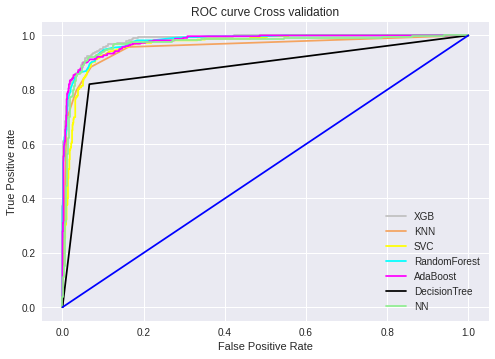

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='solid',color='silver', label='XGB')
plt.plot(fpr2, tpr2, linestyle='solid',color='sandybrown', label='KNN')
plt.plot(fpr3, tpr3, linestyle='solid',color='yellow', label='SVC')
plt.plot(fpr4, tpr4, linestyle='solid',color='cyan', label='RandomForest')
plt.plot(fpr5, tpr5, linestyle='solid',color='magenta', label='AdaBoost')
plt.plot(fpr6, tpr6, linestyle='solid',color='black', label='DecisionTree')
plt.plot(fpr7, tpr7, linestyle='solid',color='lightgreen', label='NN')
plt.plot(p_fpr, p_tpr, linestyle='solid', color='blue')
# title
plt.title('ROC curve Cross validation')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC curve Cross validation',dpi=300)
plt.show();

In [ ]:
# model1 XGBClassifier
# model2 knn

#model3 SVC

# model4 RandomForestClassifier

# model5 AdaBoostClassifier

# model6 DecisionTreeClassifier

# model7 MLPClassifier

